---
#                                Разбор данных из интернет магазина 
---

- Полученные данные были очищены и преобразованы для анализа
- Получены месяцы с самой большой выручкой
- Получены самые прибыльные дни и часы
- Найдена выручка по городам 
- Построены графики к найденным значениям


In [71]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [72]:
january_df = pd.read_csv("files/Sales_January_2019.csv", sep=",")
february_df = pd.read_csv("files/Sales_February_2019.csv", sep=",")
march_df = pd.read_csv("files/Sales_March_2019.csv", sep=",")
april_df = pd.read_csv("files/Sales_April_2019.csv", sep=",")
may_df = pd.read_csv("files/Sales_May_2019.csv", sep=",") 
june_df = pd.read_csv("files/Sales_June_2019.csv", sep=",")
july_df = pd.read_csv("files/Sales_July_2019.csv", sep=",")
august_df = pd.read_csv("files/Sales_August_2019.csv", sep=",")
september_df = pd.read_csv("files/Sales_September_2019.csv", sep=",")
october_df = pd.read_csv("files/Sales_October_2019.csv", sep=",")
november_df = pd.read_csv("files/Sales_November_2019.csv", sep=",")
december_df = pd.read_csv("files/Sales_December_2019.csv", sep=",")
list_of_dfs = [january_df,february_df,march_df,april_df,may_df,june_df,july_df,
              august_df,september_df,october_df,
              november_df,december_df]

In [73]:
main_df = pd.concat(list_of_dfs,ignore_index=True)
main_df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [76]:
main_df.dropna(how="all",inplace=True)

In [77]:
main_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [78]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [79]:
main_df.rename(columns={"Order ID":"order_id","Quantity Ordered":"quantity",
                        "Price Each":"price_each","Order Date":"order_date",
                       "Purchase Address":"purchase_address"},inplace=True)

In [80]:
main_df

,order_id,Product,quantity,price_each,order_date,purchase_address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [81]:
main_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          186305 non-null  object
 1   Product           186305 non-null  object
 2   quantity          186305 non-null  object
 3   price_each        186305 non-null  object
 4   order_date        186305 non-null  object
 5   purchase_address  186305 non-null  object
dtypes: object(6)
memory usage: 76.2 MB


In [82]:
main_df.drop( main_df[ main_df.quantity.str.contains("Quantity Ordered") ].index, inplace=True)

In [83]:
main_df.quantity = main_df.quantity.astype("uint8")

In [84]:
main_df.price_each = main_df.price_each.astype("float64")

In [85]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   quantity          185950 non-null  uint8  
 3   price_each        185950 non-null  float64
 4   order_date        185950 non-null  object 
 5   purchase_address  185950 non-null  object 
dtypes: float64(1), object(4), uint8(1)
memory usage: 8.7+ MB


In [86]:
main_df.order_date = pd.to_datetime(main_df.order_date)

/var/folders/ks/l4dx0b9n0d9269dk2r2w0k940000gn/T/ipykernel_9533/147631186.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  main_df.order_date = pd.to_datetime(main_df.order_date)


In [87]:
main_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   quantity          185950 non-null  uint8         
 3   price_each        185950 non-null  float64       
 4   order_date        185950 non-null  datetime64[ns]
 5   purchase_address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3), uint8(1)
memory usage: 45.3 MB


In [88]:
main_df.to_csv("Sales_All_Months_2019.csv",sep=",",index=False)

In [89]:
main_df["total"] = main_df.quantity * main_df.price_each
main_df

,order_id,Product,quantity,price_each,order_date,purchase_address,total
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99
...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99


In [90]:
main_df = main_df[["order_id","Product","quantity","price_each","total","order_date","purchase_address"]]
main_df

,order_id,Product,quantity,price_each,total,order_date,purchase_address
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,7.68,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400.00,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


In [91]:
main_df["month"] = main_df.order_date.dt.month

/var/folders/ks/l4dx0b9n0d9269dk2r2w0k940000gn/T/ipykernel_9533/2508061326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df["month"] = main_df.order_date.dt.month


In [92]:
main_df

,order_id,Product,quantity,price_each,total,order_date,purchase_address,month
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12
186846,319667,AA Batteries (4-pack),2,3.84,7.68,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12
186847,319668,Vareebadd Phone,1,400.00,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12
186848,319669,Wired Headphones,1,11.99,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12


In [93]:
res = main_df.groupby("month")[["total"]].sum()
res

,total
month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


---
#  Самые прибыльные месяцы
---

In [95]:
import matplotlib.pyplot as plt

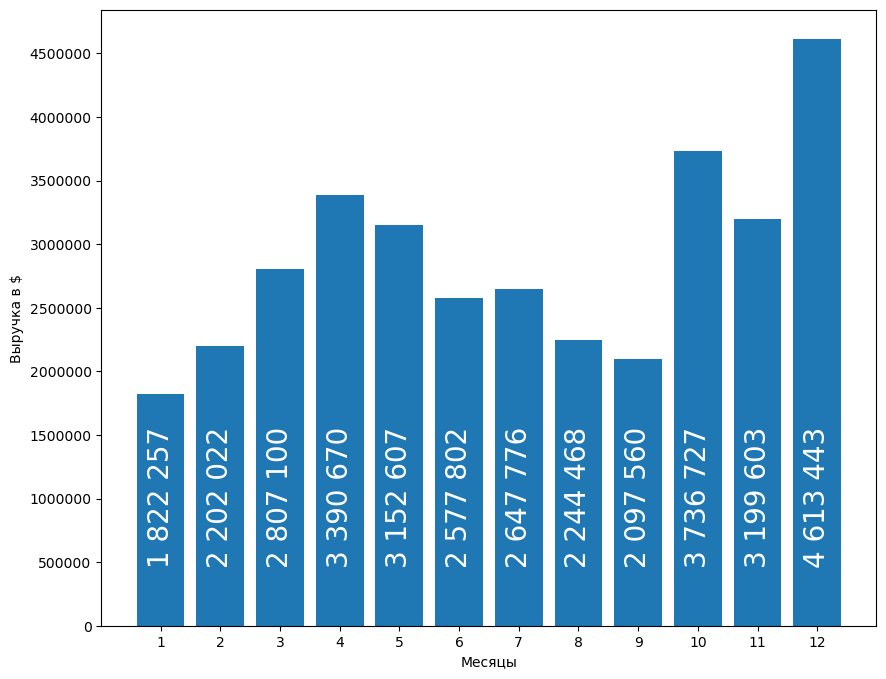

In [98]:
plt.rcParams["figure.figsize"] = [10,8]
plt.bar(res.index,res.total)
plt.xticks(range(1,13))
plt.yticks(range(0,5_000_000, 500_000))
plt.xlabel("Месяцы")
plt.ylabel("Выручка в $")
for index, value in enumerate(res.total):
    plt.text(index+1, 500_000, '{0:,}'.format(round(value)).replace(',', ' '),
                                              rotation="vertical",size="20",color="white", ha="center")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.show()

> Как видно из графика самый **прибыльный** месяц - `Январь`, самый **неприбыльный** - `Декабрь`. В целом, это легко объясняется тем, что люди тратят бьльшую часть деег перед новым годом, тоесть в Январе.

In [125]:
main_df
main_df.order_date = pd.to_datetime(main_df.order_date)


In [116]:
main_df["Hour"] = main_df.order_date.dt.hour
main_df["Day"] = main_df.order_date.dt.day_name()
main_df

,order_id,Product,quantity,price_each,order_date,purchase_address,Hour,Day
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",21,Tuesday
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14,Monday
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",13,Thursday
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",20,Saturday
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11,Friday
...,...,...,...,...,...,...,...,...
185945,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",20,Wednesday
185946,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,Sunday
185947,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",6,Monday
185948,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",10,Tuesday


---
# Самые лучшие чамы по кол-ву заказов и сумме заказов
---

In [121]:
main_df["total"] = main_df.quantity * main_df.price_each
result = main_df.groupby('Hour')["total"].agg(["sum","count"])


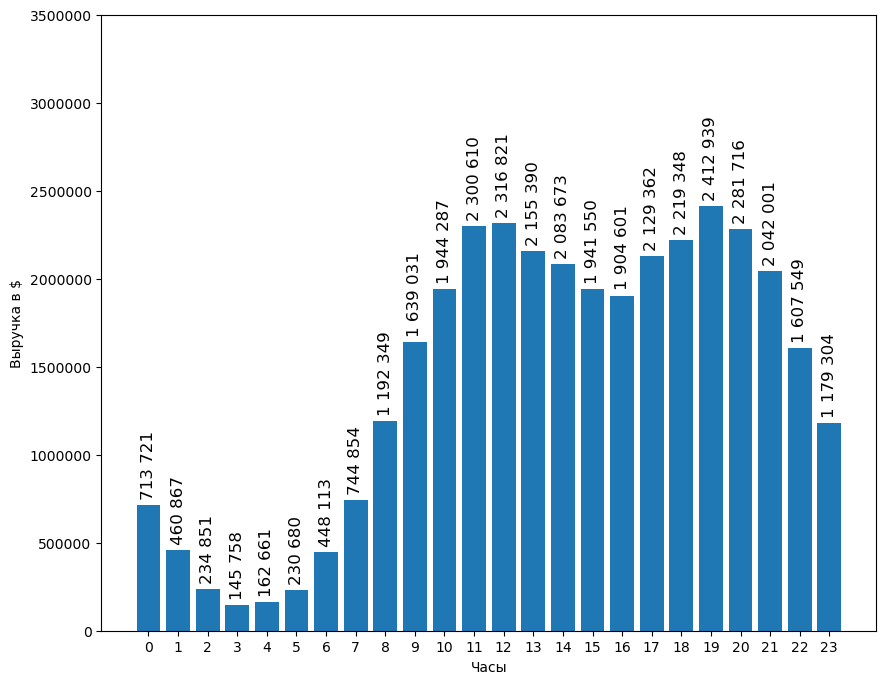

In [122]:
plt.rcParams["figure.figsize"] = [10,8]
plt.bar(result.index,result["sum"])
plt.xticks(range(0,24))
plt.yticks(range(0,int(result["sum"].max())+1_500_000, 500_000))
plt.xlabel("Часы")
plt.ylabel("Выручка в $")
for index, value in enumerate(result["sum"]):
    plt.text(index, int(value)+50_000, '{0:,}'.format(round(value)).replace(',', ' '),
                                              rotation="vertical",size="12",color="black", ha="center")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
# plt.grid(True)
plt.show()

In [123]:
main_df.to_csv("Sales_All_Months_2019.csv",sep=",",index=False)

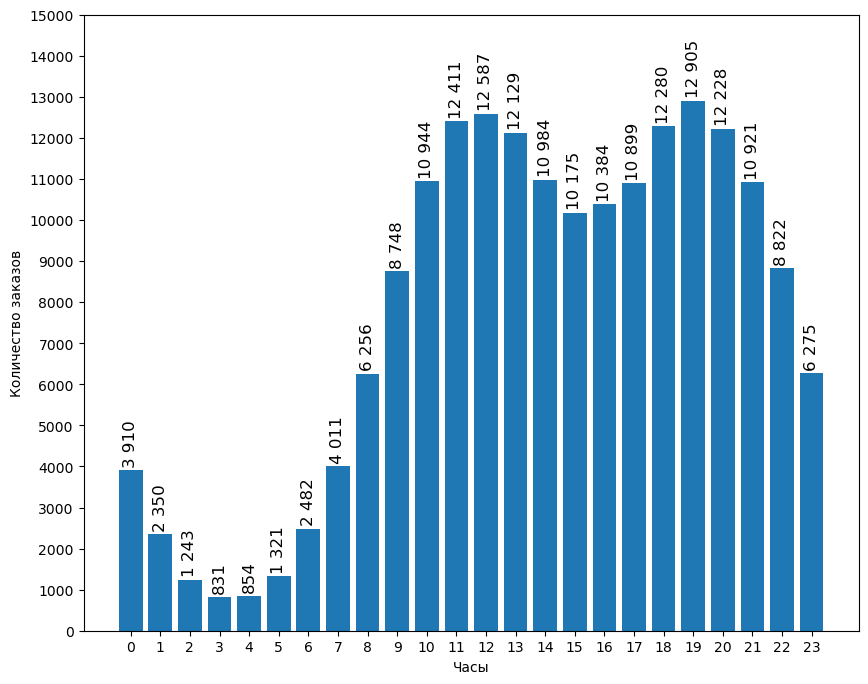

In [124]:
# plt.rcParams["figure.figsize"] = [10,8]
plt.bar(result.index,result["count"])
plt.xticks(range(0,24))
plt.yticks(range(0, int(result["count"].max())+3000, 1000))
plt.xlabel("Часы")
plt.ylabel("Количество заказов")
for index, value in enumerate(result["count"]):
    plt.text(index, int(value)+150, '{0:,}'.format(round(value)).replace(',', ' '),
                                              rotation="vertical",size="12",color="black", ha="center")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
# plt.grid(True)
plt.show()

>  Из обоих графиков видно, что в целом от количесвта заказов зависит их сумму, т.е у нас `прямая` зависимость суммы от количества заказов. По пиковым знчениям видно, что люди совершают заказы ближе к обеденному времени и после работы и почти что не заказывают в ночное время.

In [ ]:
main_df

In [ ]:
day_result = main_df.groupby("Day")["total"].agg(["sum","count"])

In [ ]:
day_result.sort_values(by="sum",ascending=False)

In [102]:
df = pd.read_csv("Sales_All_Months_2019.csv", sep=",")
df

,order_id,Product,quantity,price_each,order_date,purchase_address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
185945,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
185946,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
185947,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
185948,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


In [103]:
df["city"] = df.purchase_address.str.match(r", ([a-z]\w+),")

In [128]:
def get_city(address):
    pattern = r", (.*?, [A-Z]{2,3})"
    return re.findall(pattern, address,flags=re.IGNORECASE)[0]
main_df["city"] = df.purchase_address.apply(get_city)


In [131]:
res_city = main_df.groupby("city")[["total"]].sum()
res_city


,total
city,
"Atlanta, GA",2795498.58
"Austin, TX",1819581.75
"Boston, MA",3661642.01
"Dallas, TX",2767975.40
"Los Angeles, CA",5452570.80
"New York City, NY",4664317.43
"Portland, ME",449758.27
"Portland, OR",1870732.34
"San Francisco, CA",8262203.91


---
# Суммы покупок по городам
---

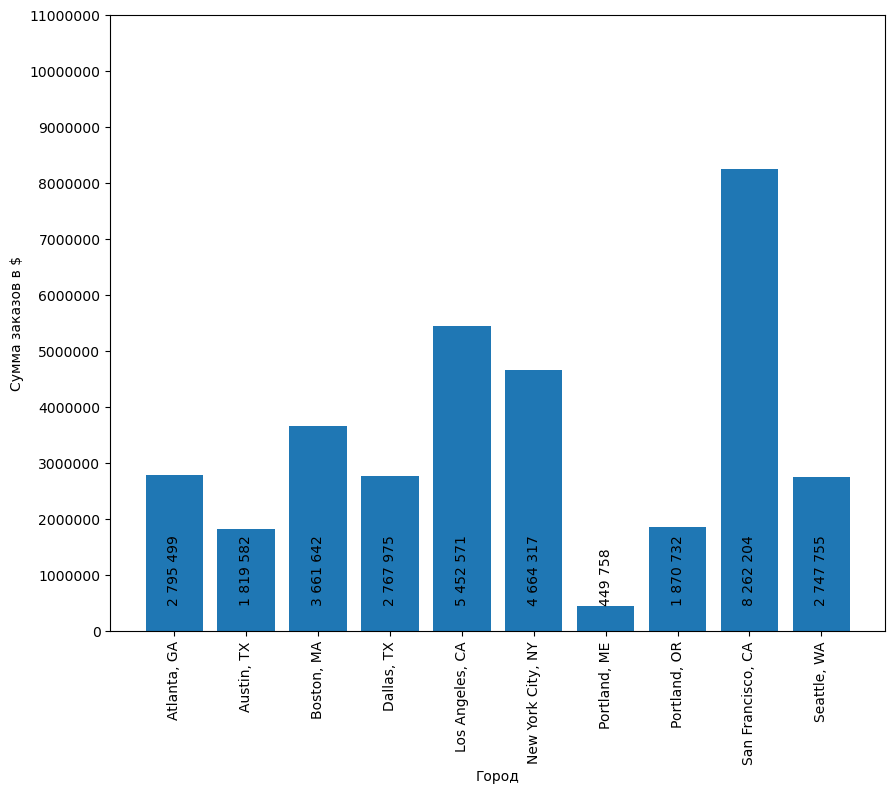

In [106]:
plt.rcParams["figure.figsize"] = [10,8]
plt.bar(res_city.index,res_city["total"])
plt.xticks(rotation ="vertical")
plt.yticks(range(0, int(res_city["total"].max())+3_500_000, 1_000_000))
plt.xlabel("Город")
plt.ylabel("Сумма заказов в $")
for index, value in enumerate(res_city["total"]):
    plt.text(index, 500_000, '{0:,}'.format(round(value)).replace(',', ' '),
                                              rotation="vertical",size="10",color="black", ha="center")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
# plt.grid(True)
plt.show()

---
# Гипотезы, из-за чего такой результат
---

> **Плотность населения:**
В больших городах, например, в Нью-Йорке, Лос-Анджелесе и Сан-Франциско, живет очень много людей. Из-за этого там больше магазинов, развлечений и возможностей для покупок. Это привлекает множество покупателей из разных мест. В таких городах люди часто предпочитают делать покупки онлайн из-за удобства. Поэтому объем покупок в интернет-магазинах в таких местах может быть больше.

>**Экономический статус:**
В городах с более высоким уровнем доходов, как Сан-Франциско и Нью-Йорк, люди обычно зарабатывают больше денег. Им доступны более дорогие товары и услуги, которые они могут себе позволить. Поэтому они склонны тратить больше денег на покупки. Кроме того, в таких городах больше людей с высоким уровнем дохода, и это также может повлиять на общий объем покупок в интернет-магазинах.